<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Praga, República Tcheca*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Praga, República Tcheca, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Prague (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/czech-republic/prague/prague/2021-03-13/visualisations/listings.csv')

## Análise dos Dados
Esta etapa serve para entendermos como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23163,"Quiet 1BR directly in the Centre, Air-conditio...",5282,Klara,NaN,Praha 1,50.08229,14.41552,Entire home/apt,1906,1,20,2020-08-22,0.16,50,158
1,23169,M302-Cozy Serviced Studio in Center,5282,Klara,NaN,Praha 1,50.08898,14.42438,Entire home/apt,1144,1,82,2020-12-17,0.62,50,61
2,26748,Apartment Great LETNA & Terrace,113902,Daniel+Bea,NaN,Praha 7,50.10011,14.42567,Entire home/apt,2756,3,357,2020-09-29,2.79,3,36
3,26755,Central Prague Old Town Top Floor,113902,Daniel+Bea,NaN,Praha 1,50.08569,14.43344,Entire home/apt,2093,3,253,2020-11-27,3.56,3,256
4,30762,R23-Elegant Serviced 86m2 | Center,5282,Klara,NaN,Praha 1,50.08821,14.42623,Entire home/apt,3381,1,12,2019-11-04,0.10,50,61


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Iremos identificar a quantidade de entradas que o *dataset* possui e ver os tipos de dados.

Este *dataset* que estamos utilizando é uma versão "compacta" do Airbnb. No mesmo local que baixamos o arquivo ```listings.csv```. Tem a versão completa, com 35847 entradas e 106 variáveis (```listings.csv.gz```)

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# verificar os tipos de dados do dataset
display(df.dtypes)

Entradas:	 7630
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Iremos analisar a quantidade valores nulos contidos no *dataset*, entender se esses valores são significativos ao serem comparados com o total de entradas, é importantíssimo. Tendo em vista que a qualidade de um conjunto de dados está relacionada à quantidade de valores ausentes.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 15%.
* A coluna `host_name` têm aproximadamente 0,1% dos valores nulos.
* A variável `name` têm aproximadamente 0,04% dos valores nulos.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.151769
last_review                       0.151769
host_name                         0.013893
name                              0.000393
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Irei plotar o histograma para analisar como as variáveis estão distribuídas.

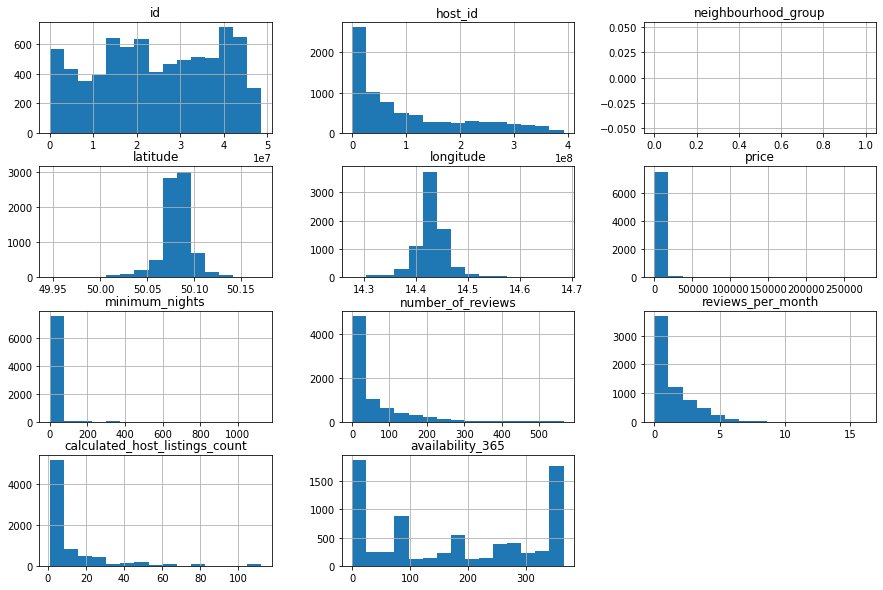

In [ ]:
,# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Analisando outliers

Conforme o histograma está distribuído, podemos notar alguns indícios de *outliers*. Nas váriaveis ```price```, ```minimum_nights``` e ```calculated_host_listings_count```, por exemplo.

Esses valores distorcem a representação gráfica. Existem duas maneiras rápidas para verificarmos os *outliers*. São elas:

- Método ```describe()```, que apresenta um resumo estatístico;
- Plotar ```boxplots``` para a variável.


In [ ]:
# resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7630.000000,7630.000000,7630.000000,6472.000000,7630.000000,7630.000000
mean,3076.674443,4.103932,52.359109,1.376494,11.467104,175.920315
std,9435.494731,27.477563,79.125942,1.446443,19.218849,140.463150
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,916.000000,1.000000,2.000000,0.240000,1.000000,30.000000
50%,1436.000000,2.000000,18.000000,0.830000,4.000000,174.000000
75%,2500.000000,2.000000,70.000000,2.130000,11.000000,324.000000
max,278000.000000,1124.000000,566.000000,16.170000,112.000000,365.000000


Analisando o resumo estatístico acima, algumas hipóteses podem ser confirmadas. São elas:
- A variável ```price``` apresenta 75% dos preços abaixo de 2500, entretanto o valor máximo é de 278000;
- A quantidade miníma de noites (```minimum_nights```) está acima de 365 dias.

### Boxplot para ```minimum_nights```

minimum_nights: valores acima de 30:
86 entradas
1.1271%


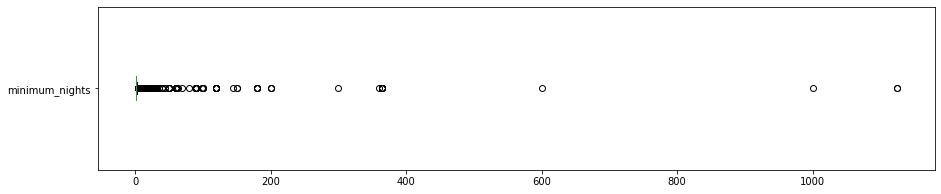

In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


### Boxplot para ```price```

price: valores acima de 3000:
1520 entradas
19.9214%


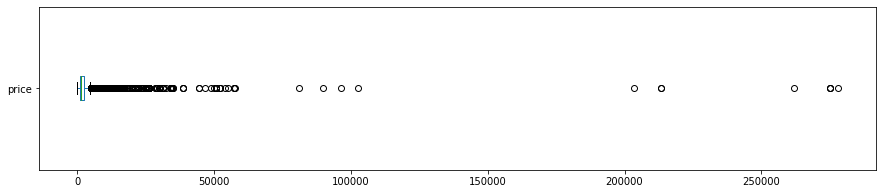

In [ ]:
# price 
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show

# ver a quantidade de valores acima de 3000 para price
print("price: valores acima de 3000:")
print("{} entradas".format(len(df[df.price > 3000])))
print("{:.4f}%".format((len(df[df.price > 3000]) / df.shape[0])*100))

### Histogramas sem *outliers*
Após identificar os *outliers* das variáveis ```price``` e ```minimum_nights```, vamos retirá-los do *DataFrame* e plotar um histograma novo. 

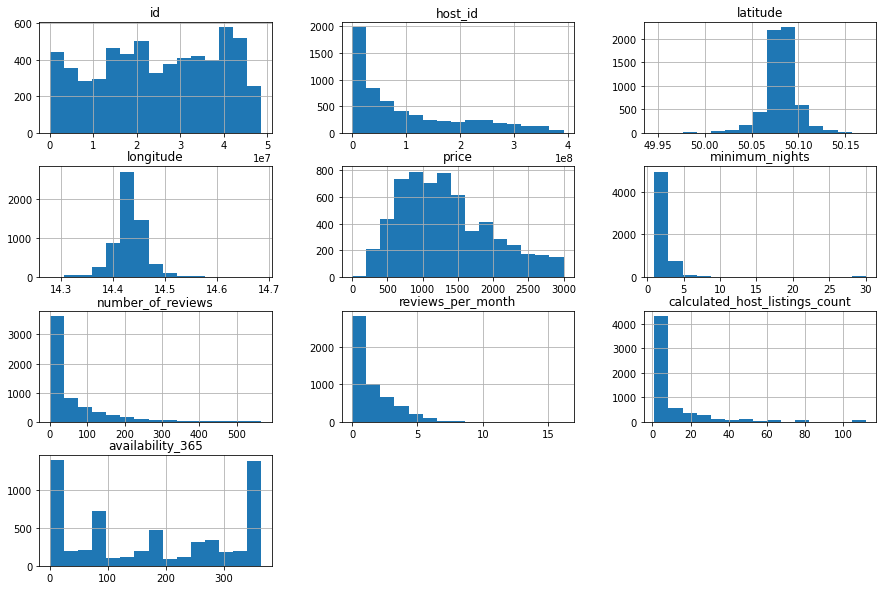

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group por estar vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**


In [ ]:
# ver a média da coluna `price``
df_clean['price'].mean()

1323.9903893951946

### **Q4. Qual a correlação existente entre as variáveis**
Correlação é a relação entre duas coisas. No contexto desse *notebook*, estamos buscando duas váriaveis que tenham relação uma com a outra.
O coeficiente de correlação é quem mede a intensidade dessa relação.  Para identificar as correlações existentes entre as variáveis de interesse, vou:

- Criar uma matriz de correlação
- Gerar um *heatmap* a partir dessa matriz, usando a biblioteca ```seaborn```

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021794,-0.107378,-0.148101,0.004560,0.079307
minimum_nights,-0.021794,1.000000,-0.041983,-0.075517,-0.063648,-0.031095
number_of_reviews,-0.107378,-0.041983,1.000000,0.829871,0.091888,0.007761
reviews_per_month,-0.148101,-0.075517,0.829871,1.000000,0.070723,-0.056824
calculated_host_listings_count,0.004560,-0.063648,0.091888,0.070723,1.000000,0.028663
availability_365,0.079307,-0.031095,0.007761,-0.056824,0.028663,1.000000


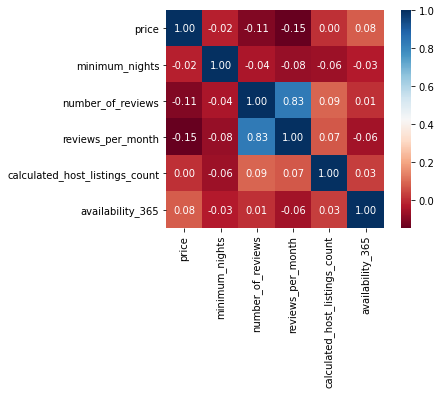

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu',fmt='.2f', square=True, annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` mostra o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4583
Private room       1111
Hotel room          228
Shared room         113
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.600655
Private room       0.145609
Hotel room         0.029882
Shared room        0.014810
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Para comparar os bairros (*neighbourhooods*) pelo preço de locação, vamos utilizar  a função ```groupby()```.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dolní Počernice    1947.833333
Lysolaje           1577.000000
Praha 1            1539.199240
Libuš              1519.428571
Dolní Chabry       1480.100000
Praha 11           1421.884615
Zbraslav           1385.000000
Čakovice           1367.750000
Petrovice          1328.111111
Praha 2            1324.803653
Name: price, dtype: float64

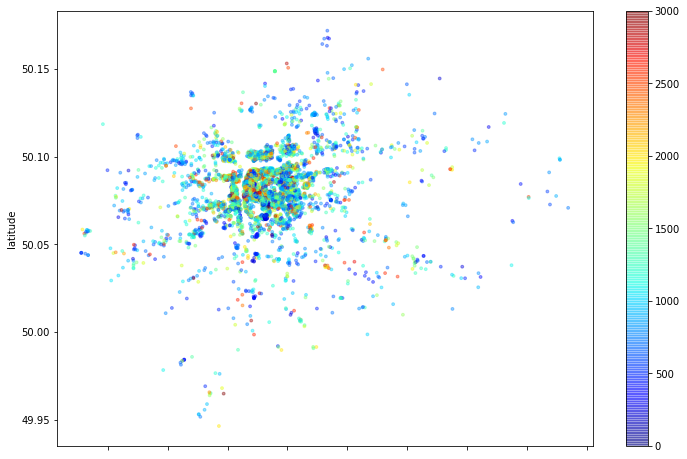

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

2.3980115990057995

## Conclusões


Este *notebook* é apenas uma análise inicial, tendo em vista que o *dataset* é uma versão resumida.

Nota-se que a partir desse estudo primário percebemos que alguns dados podem estar distorcendo a visualização geral. Assim, a análise completa precisaria de uma extração de todos *outliers* e uma atenção especial nas localidades que possuem poucos imóveis e com preços elevados